<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left"/>
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.856 · Anàlisi de sentiments i xarxes socials</p>
    <p style="margin: 0; text-align:right;">Màster universitari de Ciència de Dades (<i>Data Science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>
    
# Anàlisi de sentiments i xarxes socials
## PLA4: Representació de xarxes socials com a grafs

# EXPORTAR I IMPORTAR GRAFS

Encara que NetworkX proporcioni eines bàsiques (com es veurà més a baix) per a visualitzar els seus grafs, el seu objectiu principal és l'anàlisi i no la visualització. Fins i tot és possible que en versions futures de NetworkX s'elimini aquesta opció perquè no és el seu focus.

Visualitzar grafs de manera adequada no és fàcil, així que és millor usar eines que hi estiguin dedicades. Dues de les millors opcions són

- [Cytoscape](http://www.cytoscape.org/)
- [Gephi](https://gephi.org/)

Tots dos permeten la importació de grafs creats a NetworkX, però per a això haurem de veure com s'escriuen (o guarden) grafs des de NetworkX (i el seu complementari, la lectura).

Hi ha més formats i possibilitats, però aquí n’explorarem cinc:

- Llistes d'adjacència (o *adjacency lists*)
- Llistes d'arestes (o *edge lists*)
- Matriu d'adjacència
- GraphXML
- Pajek

### *Adjacency list*

És una forma molt simplista i que només val per a nodes representables amb strings i sense atributs addicionals ni en els seus nodes ni en les seves arestes. 

Vegem-ne el format:


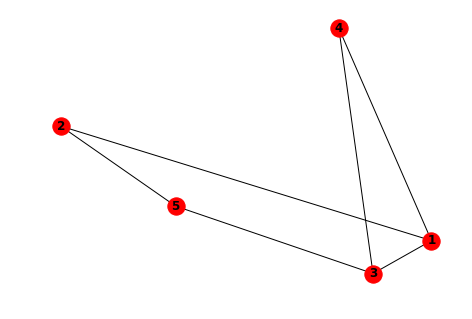

In [2]:
# Preparem un graf simple d'exemple.
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1, 2), (1, 3),(1, 4),(2, 5),(3, 4),(3, 5)])
nx.draw_random(G, with_labels=True, font_weight='bold')
plt.show()

In [3]:
# Escrivim la llista a un fitxer.
nx.write_adjlist(G,"test.adjlist")

Si l’obrim descobrirem un fitxer amb diverses línies de comentaris (marcades amb #) i cinc línies (una per node):

```
1 2 3 4
2 5
3 4 5
4
5
```

El primer node és el node origen i els següents són tots els nodes als quals es connecta. La primera línia indica, per exemple, que hi ha les arestes (1,2), (1,3) i (1,4). 

Cal observar que només apareixen les arestes una vegada (és a dir, (1,2) no torna a aparèixer com a (2,1)).

L'operació contrària, llegir, es faria amb:

- nx.read_adjlist("test.adjlist").

Trobareu més informació (i paràmetres possibles) sobre adjlist  [aquí](https://networkx.github.io/documentation/stable/reference/readwrite/adjlist.html), com qualsevol funció de NetworkX.


### *Edge lists*

Les llistes d'arestes tenen avantatges i inconvenients, encara que són un format bastant habitual. Aquí són les arestes les que s'emmagatzemen (*node_origen* *node_desti*) i els seus atributs corresponents a continuació, si escau, sigui de forma arbitrària o com a diccionari de Python. A canvi, no es poden emmagatzemar atributs del graf o dels seus nodes i tampoc no hi ha manera de representar els nodes aïllats (tret que tinguin un enllaç reflexiu sobre ells mateixos).

Som-hi, doncs:

In [4]:
# Afegim alguns atributs al graf G.
G.add_edges_from([(1, 2, {'color': 'blue'}), (1, 3, {'weight': 8}),(3, 4, {'color': 'red', 'weight': 3})])

# El guardem com a edgelist.
nx.write_edgelist(G,'test.edgelist')

# També hi ha opcions per a no conservar els atributs.
nx.write_edgelist(G,'test_no_data.edgelist',data=False)
# O només alguns.
nx.write_edgelist(G,'test_color.edgelist',data=['color'])

Veiem que els resultats són els esperats en els tres fitxers creats:

**Test**
```
1 2 {'color': 'blue'}
1 3 {'weight': 8}
1 4 {}
2 5 {}
3 4 {'color': 'red', 'weight': 3}
3 5 {}
```
**Test sense atributs**
```
1 2
1 3
1 4
2 5
3 4
3 5
```
**Test només amb color**
```
1 2 blue
1 3
1 4
2 5
3 4 red
3 5

```

Més informació (i paràmetres possibles) sobre adjlist [aquí](https://networkx.github.io/documentation/stable/reference/readwrite/edgelist.html)


### Matriu d'adjacència

In [5]:
import numpy as np

a = nx.to_numpy_matrix(G)
# G = nx.from_numpy_matrix(a, create_using= nx.DiGraph())
a

matrix([[0., 1., 8., 1., 0.],
        [1., 0., 0., 0., 1.],
        [8., 0., 0., 3., 1.],
        [1., 0., 3., 0., 0.],
        [0., 1., 1., 0., 0.]])

### GraphXML

Aprofitant els avantatges d'un sistema sintàctic «ordenat»,  l’XML, GraphXML defineix una estructura comuna per a representar, arxivar o processar gairebé qualsevol tipus de gràfic. Funciona amb una part estructural que descriu el nucli del graf i extensions per a les dades addicionals. L'especificació concreta està disponible [online](http://graphml.graphdrawing.org/specification.html) i està pensada per a ser un estàndard comú. Només presenta alguns problemes amb grafs mixts (els que contenen una mescla d'arestes dirigides i no dirigides) encara que no són habituals.

És, probablement, el mètode més pràctic per a usar-lo posteriorment en una eina externa, ja que s'entén especialment bé amb Cytoscape, Gephi i similars.


Mètodes:

In [6]:
# Seguim amb G al qual hem afegit atributs en el pas anterior.
nx.write_graphml_lxml(G, "test.graphml")

# A NetworkX 2.0 se suggereix usar la versió superior, però també és igualment vàlida la funció anterior:
nx.write_graphml(G, "test2.graphml")

El fitxer obtingut és molt més estructurat i amb etiquetes:
```xml
<?xml version='1.0' encoding='utf-8'?>
<graphml xmlns="http://graphml.graphdrawing.org/xmlns" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd">
<key attr.name="weight" attr.type="long" for="edge" id="d1"/>
<key attr.name="color" attr.type="string" for="edge" id="d0"/>
<graph edgedefault="undirected"><node id="1"/>
<node id="2"/>
<node id="3"/>
<node id="4"/>
<node id="5"/>
<edge source="1" target="2">
  <data key="d0">blue</data>
</edge>
<edge source="1" target="3">
  <data key="d1">8</data>
</edge>
<edge source="1" target="4"/>
<edge source="2" target="5"/>
<edge source="3" target="4">
  <data key="d0">red</data>
  <data key="d1">3</data>
</edge>
<edge source="3" target="5"/>
</graph></graphml>
```
La lectura seria, al seu torn, amb *read_graphml*.

### Pajek

Finalment, cal esmentar el format Pajek (*aranya* en eslovè), un dels més antics i, per tant, en el qual es poden trobar emmagatzemades moltes dades històriques o sets de mostra.

La seva dinàmica és semblant a les anteriors:

In [7]:
# El guardem en Pajek
nx.write_pajek(G, "test.net")

Aquí es veu el contingut del fitxer, que és una mica més particular. Una llista de vèrtexs i una llista d'arestes amb els seus atributs. Observeu que els pesos que no hi són s'han posat a 1, que els atributs addicionals tenen nom i valor, i que els atributs no usats són en els nodes.
```
*vertices 5
1 1 0.0 0.0 ellipse
2 2 0.0 0.0 ellipse
3 3 0.0 0.0 ellipse
4 4 0.0 0.0 ellipse
5 5 0.0 0.0 ellipse
*edges
1 2 1.0 color blue
1 3 8
1 4 1.0
2 5 1.0
3 4 3 color red
3 5 1.0
```

Llegir seria tan senzill com tenir un fitxer amb el format adequat i usar *read_pajek()*.

### Altres formats

Aquests no són els únics; hi ha opcions com les de treure JSON amb diverses disposicions disponibles i altres estàndards, però tampoc cal oblidar la possibilitat de representar el graf en una matriu d'adjacència. Aquestes matrius, no obstant això, solen contenir molts zeros i, per tant, certa ineficiència, que se soluciona amb l'ús de les matrius disperses.

# DIBUIX BÀSIC

Com s'ha dit anteriorment, no entrarem massa en aquest punt perquè el dibuix no és un dels punts forts de NetworkX (i és molt més adequat exportar-lo i usar-lo en entorns externs). Però sí que va bé veure algunes funcions bàsiques per representar els exemples futurs de forma ràpida.

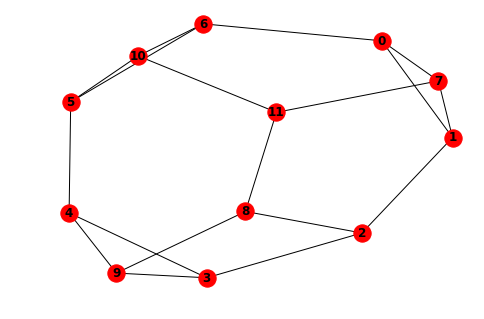

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Preparem un graf conegut, en aquest cas el Frucht.
H = nx.frucht_graph()

nx.draw(H, with_labels=True, font_weight='bold')
plt.show()

Però cada vegada que executem el codi el graf es dibuixa de manera diferent, gairebé aleatòria. Vegem algunes de les opcions de posicionament que hi ha:

| Nom           | Efecte        |   
| ------------- |--------------|
| circular_layout    | En cercle |
| random_layout      | Aleatòriament però uniforme      |
| shell_layout      | Cercles concèntrics |
| spring_layout      | Usant l'algoritme de Fruchterman-Reingold      |

Hi ha més opcions però aquestes són probablement les més senzilles (i *spring_layout* sol donar suficientment bons resultats per al seu ús).

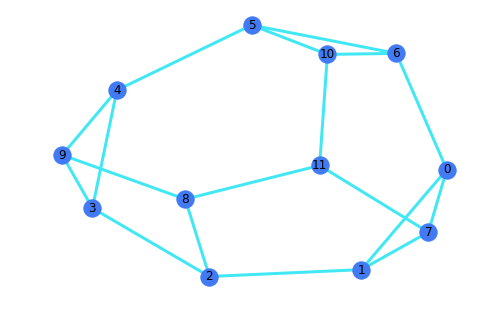

In [9]:
# Anem a preparar pos (la posició) dels nodes, per exemple amb spring_layout.
pos = nx.spring_layout(H)

# Canviem la posició però també els colors i les mides d'aresta.
nx.draw(H, pos, node_color='#427af4', edge_color='#41e8f4', width=3, with_labels=True)
plt.show()

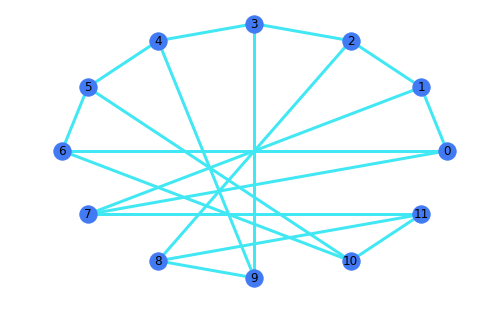

In [10]:
# Altres representacions

# Circular
pos = nx.circular_layout(H)

# Canviem posició però també colors i grandàries d'aresta
nx.draw(H, pos, node_color='#427af4', edge_color='#41e8f4', width=3, with_labels=True)
plt.show()

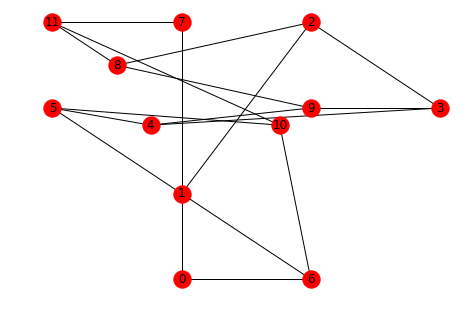

In [11]:
# També és possible definir les posicions manualment.
pos={0:(1,0),1:(1,1),2:(2,3),3:(3,2),4:(0.76,1.80),5:(0,2),
     6:(2,0),7:(1,3),8:(0.5,2.5),9:(2,2),10:(1.76,1.80),11:(0,3)} #node:(x,y)
nx.draw(H,pos=pos,with_labels=True)
plt.show()

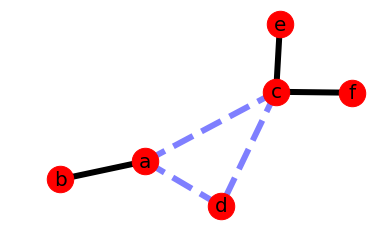

In [12]:
# Un exemple complet i útil amb diferents tipus d'arestes, pesos i colors.
# Author: Aric Hagberg (hagberg@lanl.gov)
import matplotlib.pyplot as plt
import networkx as nx

J = nx.Graph()

J.add_edge('a', 'b', weight=0.6)
J.add_edge('a', 'c', weight=0.2)
J.add_edge('c', 'd', weight=0.1)
J.add_edge('c', 'e', weight=0.7)
J.add_edge('c', 'f', weight=0.9)
J.add_edge('a', 'd', weight=0.3)

elarge = [(u, v) for (u, v, d) in J.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in J.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(J)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(J, pos, node_size=700)

# edges
nx.draw_networkx_edges(J, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(J, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(J, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()